#데이터 전처리

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
loandata = pd.read_csv("madfhantr.csv")
loandata.head(10) #10개 ()안에 입력안하면 5개

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


##결측치 확인/제거

In [20]:
#결측치 몇개인지 확인
loandata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#결측치가 뭔지에 따라 삭제하거나 임의의 값을 넣어서 진행
#여기에서는 전체 삭제
loandata.dropna(inplace=True) #기존 데이터에있는 결측치있는 sample은 data에서 삭제하는 방법

#loandata = loandata.dropna(inplace=False) >>결측치 없는 버전 새롭게 만들어주는 방법

inplace = True/False
>>True: dropna가 적용된 DataFrame자체에 dropna적용

>>False: dropna가 적용된 DataFrame은 그대로 두고,
        dropna를 적용한 새로운 DataFrame을 return

In [22]:
#결측치 있는지 없는지 재확인
loandata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
loandata.head()
#결측치가 있는 sample인 0번 sample이 빠짐

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Feature 숫자로 변형

In [55]:
loandata = loandata[["Gender", "Married", "Education", "Self_Employed", "Credit_History", "Loan_Status"]]

loandata['Gender']=loandata['Gender'].replace(to_replace='Male', value='1')
loandata['Gender']=loandata['Gender'].replace(to_replace='Female', value='0')

loandata["Married"]=loandata["Married"].replace(to_replace="Yes", value='1')
loandata["Married"]=loandata["Married"].replace(to_replace="No", value='0')

loandata["Education"]=loandata["Education"].replace(to_replace="Graduate", value='1')
loandata["Education"]=loandata["Education"].replace(to_replace="Not Graduate", value='0')

loandata["Self_Employed"]=loandata["Self_Employed"].replace(to_replace="Yes", value='1')
loandata["Self_Employed"]=loandata["Self_Employed"].replace(to_replace="No", value='0')

#Credit_History는 원래가 수치여서 바꿀필요 없음
#Loan_status는 Label이기 때문에 안바꿈
#꼭 0,1로 바꿀 필요 없음 여튼 다른 것과 구분만 되게 서로 다른 숫자로 설정해주기만 하면됨

#만약 'ApplicationIncome'을 분류조정하고 싶으면 4000대, 3000대 이런식으로 해서 4,3,2,1 이렇게 설정해주면 좋다.

In [56]:
loandata.head()

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,1,1,0,1.0,N
2,1,1,1,1,1.0,Y
3,1,1,0,0,1.0,Y
4,1,0,1,0,1.0,Y
5,1,1,1,1,1.0,Y


In [58]:
#loandata.loc는 특정 값을 변화시키고 싶을 때 사용
#(변화시키고 싶은 값을 모두 입력해서 일일이 변경)
# https://azanewta.tistory.com/34

# 데이터 학습시키기

In [32]:
from sklearn.model_selection import train_test_split

x = loandata.drop(columns=['Loan_Status']) #Loan_Status만 빼고(drop) 나머지 데이터 전부 x
y = loandata.Loan_Status

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

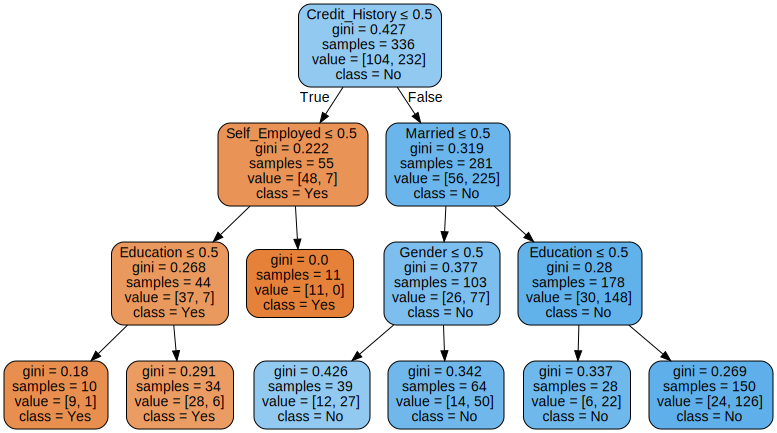

In [39]:
import graphviz #그래프 시각화 소프트웨어
dot_data = tree.export_graphviz(clf, 
                                out_file=None, #파일변환>No
                                feature_names=["Gender", "Married", "Education", "Self_Employed", "Credit_History"],
                                class_names=['Yes','No'],
                                filled=True, #색상넣을지
                                rounded=True, #반올림할지
                                special_characters=True) #특수문자 넣을지
graph = graphviz.Source(dot_data)
graph.render('Gini') #지니계수 사용
graph

<Entropy 계산하기>

전체 data 480/ Yes 148/ No 332

1


E(s)=0.891 (Entropy구하는 공식은 pdf 참고)

E(Gender=Male)=0.87 / E(Gender=Female)=0.95

E(S|Gender)=0.88 (별로 안줄었음=Gender로 나누는 거 의미 없단 소리)


이런식으로 쭉쭉 위의 그래프의 sample 개수 보면서 Entropy 계산해볼 수 있음


##Test data로 정확도 확인

In [41]:
clf.score(x_test,y_test)

0.7986111111111112

<모델 활용>

정확도가 80이므로 돈뗴먹힐 확률이 여전히 20정도 존재

20의 위험성을 제거하기 위해 상계가능한만큼 이자를 올리는 등의 조치를 취할 수 있음

##Entropy 지수 기준으로 트리 만들기

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy') #설정안하면 gini계수로 계산함
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
import graphviz

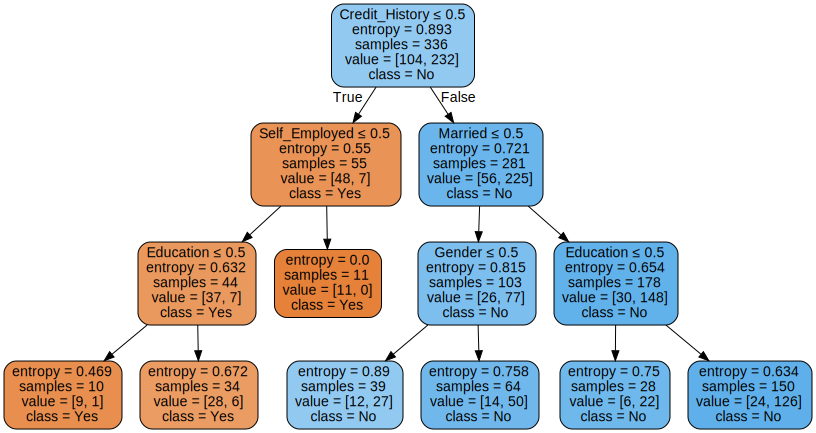

In [49]:
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
    class_names=['Yes','No'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render('entropy')
graph